### Nana Akosua Konadu Owusu-Ansah

# ConnecTel Customer Churn Prediction

### Introduction

ConnectTel, is a leading telecommunications, at the forefront of innovation and connectivity solutions. They have established itself as a trusted provider of reliable voice, data and Internet services. They offer a comprehensive range of telecommunications solutions which includes entreprise solutions, mobile networks and broadband connections. With a commitment of providing exceptional customer service and cutting edge technology. The company also ensures seamless communication experiences for millions of users worldwide. 

### Problem Overview

ConnectTel like most Telecommunication Companies, needs to address customer churn, which will subsequently 
subsequently pose a significant threat to the business sustainability and growth.

### Objective

ConnectTel intends to build a robust customer churn prediction system. ConnectTel also seeks to forecast customer churn accurately and implement targeted retention initiative.This will reduce customer attrition, enhance customer loyalty and maintain a competitive edge in the edge in the dynamic and competitive telecommunications industry.

### Task

To visualise customer trends as per the data given.
To build a machine learning model to predict customer churn.
To visualize ConnectTel's Revenue

## Import Necessary Libraries 


In [1]:
# Data Analysis and Visualization Libraries
import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Classification and Evaluation Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from collections import Counter  #counting

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### Import the Dataset

In [2]:
# import the  dataset,and give an insight into the headings in which the data is grouped in.

df_churn = pd.read_csv("Customer-Churn.csv")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Assesment 

In [3]:
# this is to check the  properties of the data. The results means there are 7043 rows and 21 columns. 
df_churn.shape


(7043, 21)

In [4]:
#checking for the information of the data. 

df_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistical Description of the Numerical Features. 
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Statistical Description of the Categorical  Features.

In [7]:
df_churn.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
# This is to know the number of customers who churned and those who did not. 
df_churn["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
#check for duplicated values

dup = df_churn.duplicated().sum()
print("Number of duplicates:", dup)

Number of duplicates: 0


In [10]:
#check for missing data

df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#Convert total charges to a float, as its suppossed to be a numerical value and not an object.

df_churn.TotalCharges = pd.to_numeric(df_churn.TotalCharges, errors= "coerce")
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### 11 values missing for Total Charges , 

In [12]:
# to locate where the null values are. 

df_churn.loc[df_churn[ "TotalCharges" ].isnull() == True]  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Data Cleaning

In [13]:
# removal of rows with missing data

df_churn.dropna(inplace=True)

In [14]:
# Updating wrongly labeled data points: some data cells has 'No phone service' and 'No internet service' intead of 'No' 

column_update = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                 'StreamingMovies']

# Looping through columns and replace 'No phone service' and 'No internet service' with 'No'
for c in column_update:
    df_churn[c] = df_churn[c].replace('No phone service', 'No')
    df_churn[c] = df_churn[c].replace('No internet service', 'No')

In [15]:
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


###### Grouping the "tenure" into 1-12 months, 1-2 years and 2-3 years, etc



In [16]:
# get the maximum tenure.  #72
print(df_churn[ "tenure" ].max())

72


In [17]:
#grouping tenure into groups of 12 months. 

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_churn["tenure_group"] = pd.cut(df_churn.tenure, range(1, 80, 12), right=False, labels=labels)

In [18]:
df_churn["tenure_group"].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [19]:
 df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [20]:
##we can decide to drop the customer ID column and the tenure  since i have created the "tenure group", however I will drop the customer ID
df_churn=df_churn.drop(["customerID"], axis=1)


In [21]:
df_churn.head()  #to check if the columns have dropped. 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Exploratory Data Analysis - this is to create insights on the data through visualisation. 

### Univariate Analysis

In [22]:
#I can equally use this syntax and explain the insights of the graphs I will get. 
### for i, predictor in enumerate (df(columns=["Churn", "TotalCharges", "MonthlyCharges"]))
    ## plt.figure(i)
    #sns.countplot(data=df, x=predictor, hue="Churn")

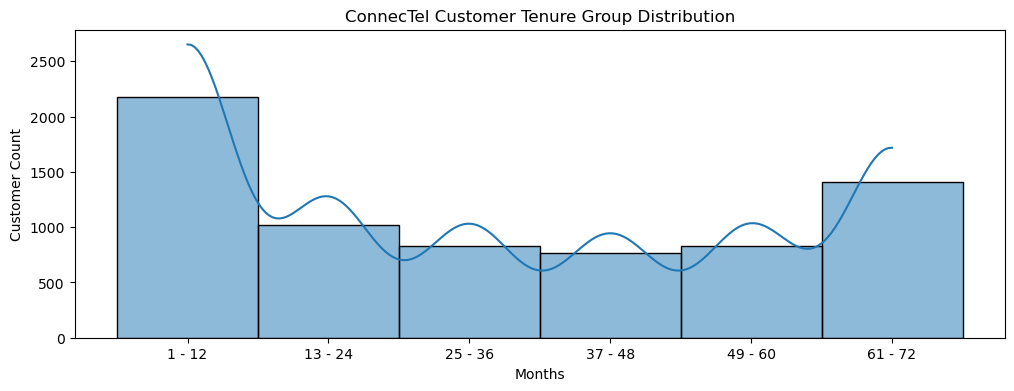

In [23]:
# Distribution of customer tenure group
plt.figure(figsize=(12,4))
sns.histplot(df_churn['tenure_group'], edgecolor='black', bins=20, kde=True)
plt.title('ConnecTel Customer Tenure Group Distribution')
plt.xlabel('Months')
plt.ylabel('Customer Count');

##### Insights : the customer group from 1 month to a year  and those from 61-72 months (6 years) form the the hightest number of customers in connecTel.

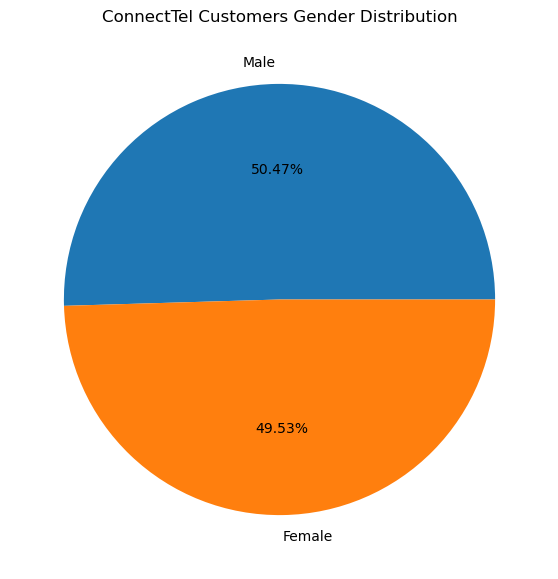

In [24]:
# ConnectTel Customers gender distribution
plt.figure(figsize=(7,7))
plt.pie(df_churn['gender'].value_counts(), labels=df_churn['gender'].value_counts().index, autopct='%1.2f%%')
plt.title('ConnectTel Customers Gender Distribution');

#### The number of male customers and female customers that ConnecTel has is almost is almost the same just 0.96% difference.

Skewness of MonthlyCharges: -0.22


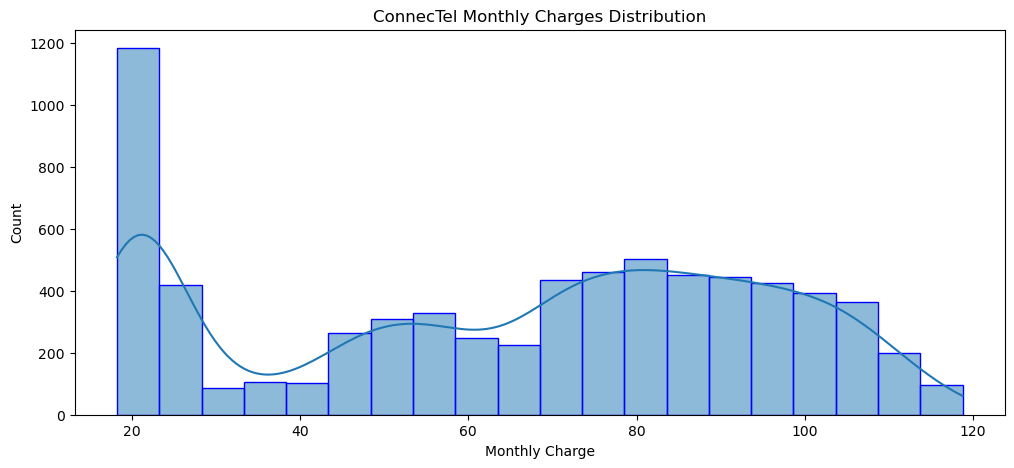

In [25]:
# ConnecTel monthly charges distribution
plt.figure(figsize=(12,5))
sns.histplot(df_churn['MonthlyCharges'], edgecolor='blue', bins=20, kde=True)
plt.title('ConnecTel Monthly Charges Distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('Count');

# Calculate the skewness of the MonthlyCharges
monthly_charges_skewness = skew(df_churn['MonthlyCharges'])
print(f"Skewness of MonthlyCharges: {monthly_charges_skewness:.2f}")

#### Insights: Most of ConnecTel customers, paid monthly charges of 20usd however the next majority also went for the 80 usd montly plan package.

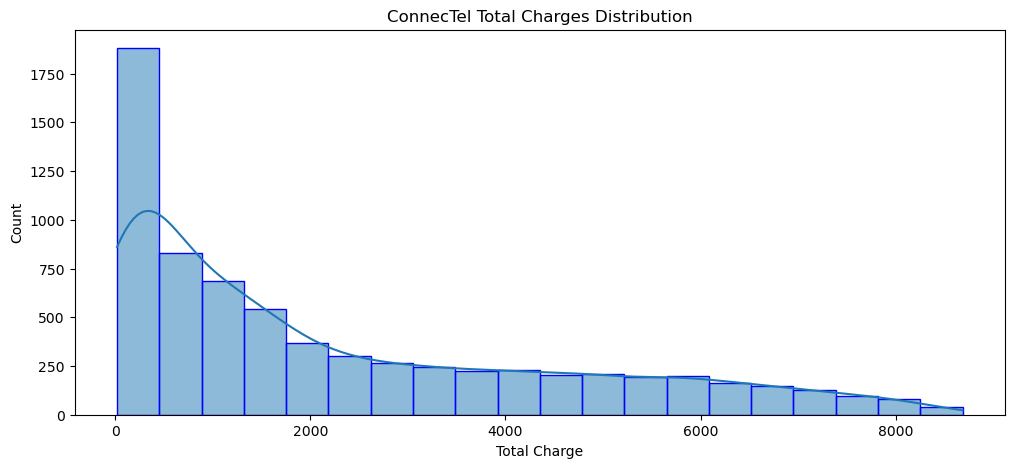

In [26]:
# ConnecTel total charges distribution
plt.figure(figsize=(12,5))
sns.histplot(df_churn['TotalCharges'], edgecolor='blue', bins=20, kde=True)
plt.title('ConnecTel Total Charges Distribution')
plt.xlabel('Total Charge')
plt.ylabel('Count');

##### Insights : From the histogram, the Total Charges  from customers are positively skewed with a large proportion of customers bringing in total revenue less than 2000 USD.  We can conclude that the customers who are bringing in hign revenues are few.

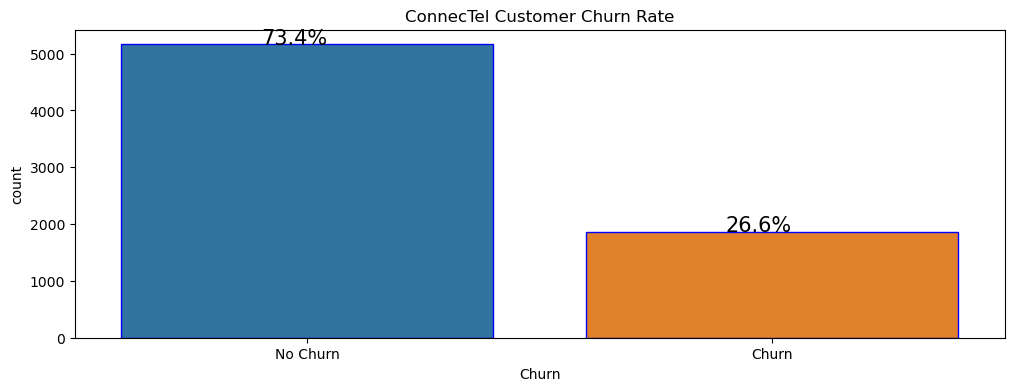

In [27]:
# ConnecTel customer churn
plt.figure(figsize=(12,4))
ax = sns.countplot(data=df_churn, x='Churn', edgecolor='blue')
plt.title('ConnecTel Customer Churn Rate')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

# Percentage calculation
total = float(len(df_churn['Churn']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15) 

##### Insights: ConnecTel customers have a no churn rate of 73.4% and a churn rate of 26.5%

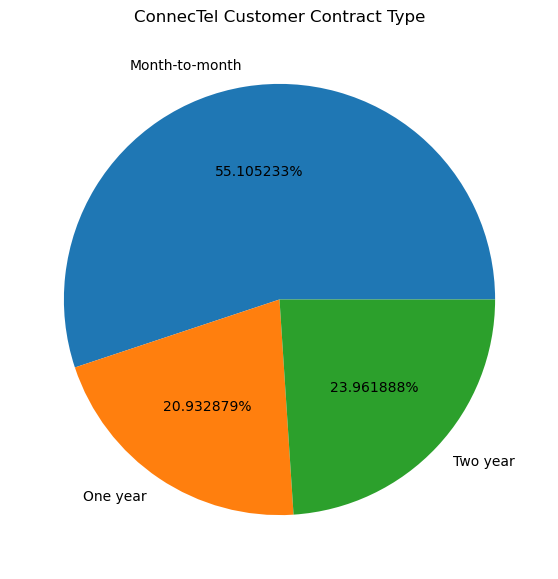

In [28]:
fig,ax= plt.subplots(figsize=(7,7))
count= Counter(df_churn["Contract"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("ConnecTel Customer Contract Type")
plt.show();

##### Insights: From the pie chart, it is evident that the highest contract type is month to month, where as the two year contract follows and then the one year contract. 

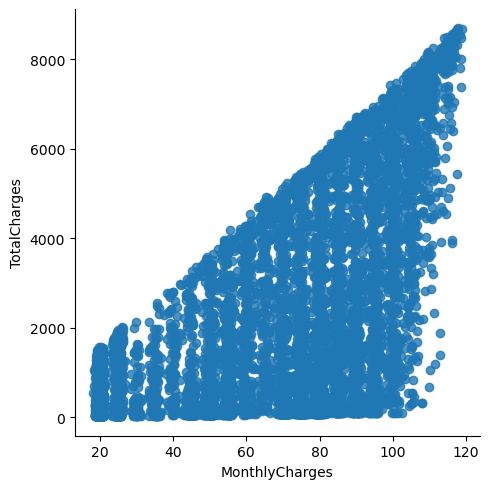

In [29]:
#Relationship between Monthly Charges and Total Charges

sns.lmplot(data=df_churn, x="MonthlyCharges", y="TotalCharges",  fit_reg=False, )

##### Insights: We can simply see that the more tthe monthly charges the more total charges also increases. 

### Bivariate Analysis

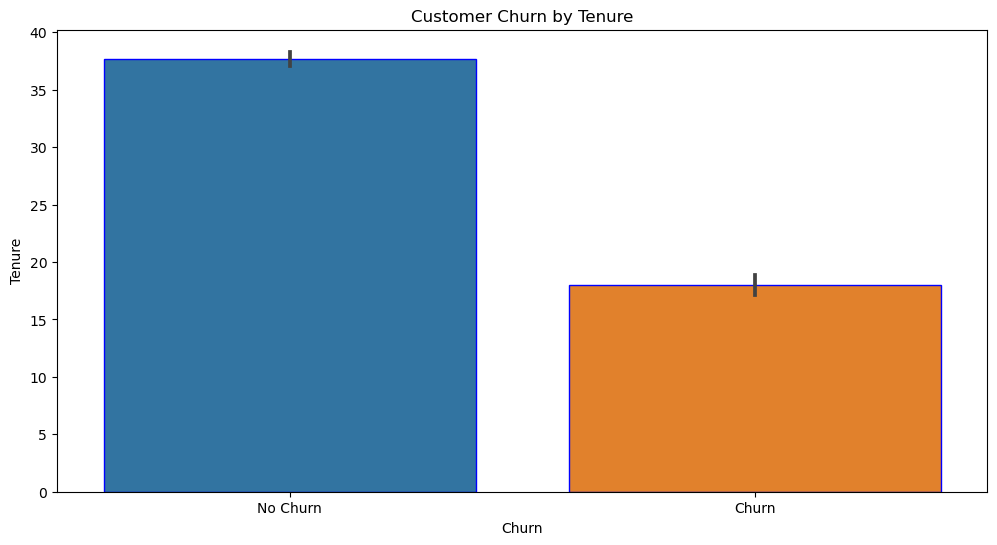

In [30]:
# Customer churn by Tenure
plt.figure(figsize=(12 ,6))
sns.barplot(data=df_churn, x='Churn', y='tenure', edgecolor='blue')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Customer Churn by Tenure')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

#### Insights: we can see from here that, the new customers (1-16) months, which was about 50% churned as compared to the customers who had been with ConnecTel till about 36 months. 

Mean Monthly Charges for Churned Customers: 74.44
Mean Monthly Charges for Retained Customers: 61.31


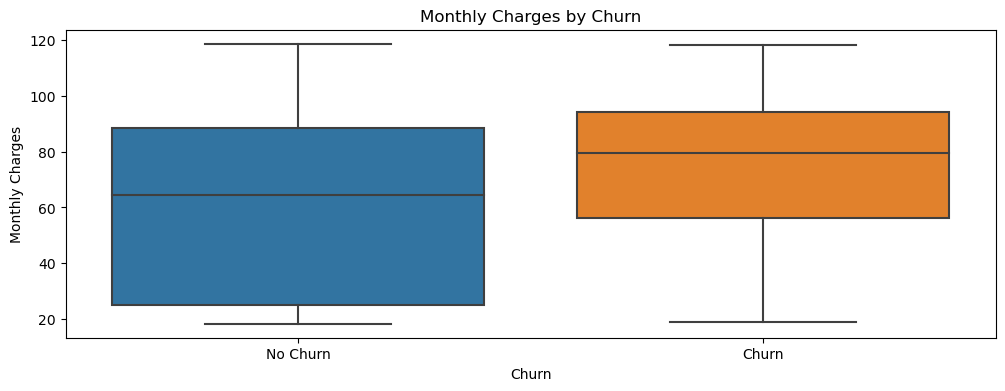

In [31]:
# Monthly charges distribution by customer churn
plt.figure(figsize=(12,4))
sns.boxplot(data=df_churn, x='Churn', y='MonthlyCharges')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

# Mean of monthly charges for churned and retained customers
mean_monthly_charges_churned = df_churn[df_churn['Churn'] == 'Yes']['MonthlyCharges'].mean()
mean_monthly_charges_retained = df_churn[df_churn['Churn'] == 'No']['MonthlyCharges'].mean()
print(f"Mean Monthly Charges for Churned Customers: {mean_monthly_charges_churned:.2f}")
print(f"Mean Monthly Charges for Retained Customers: {mean_monthly_charges_retained:.2f}")

#### Insights: From the boxplot above, we can see that theaverage  monthly charges for retained customers is 61.31, However with customers in the churn category, they pay as much as  an average of  74.44 monthly, making them the customers who bring in the highest revenue. 


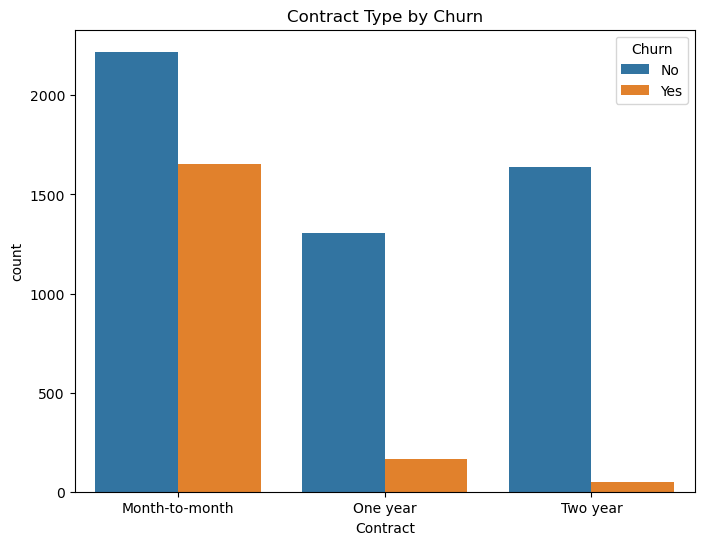

In [32]:
 #Customer Contract Type by Churn
plt.figure(figsize=(8,6))
sns.countplot(data=df_churn, x='Contract', hue='Churn')
plt.xlabel('Contract')
plt.title('Contract Type by Churn');

#### Insights: customers who are on the monthly contracts have the highest non churn and the highest number of churn as well. those on the two year contract, also have a high number of customers who have not churned and then those who have churned are very low. Then those on the one year contract have a low churn rate in comparison with customers who did not churn in that contract type. 

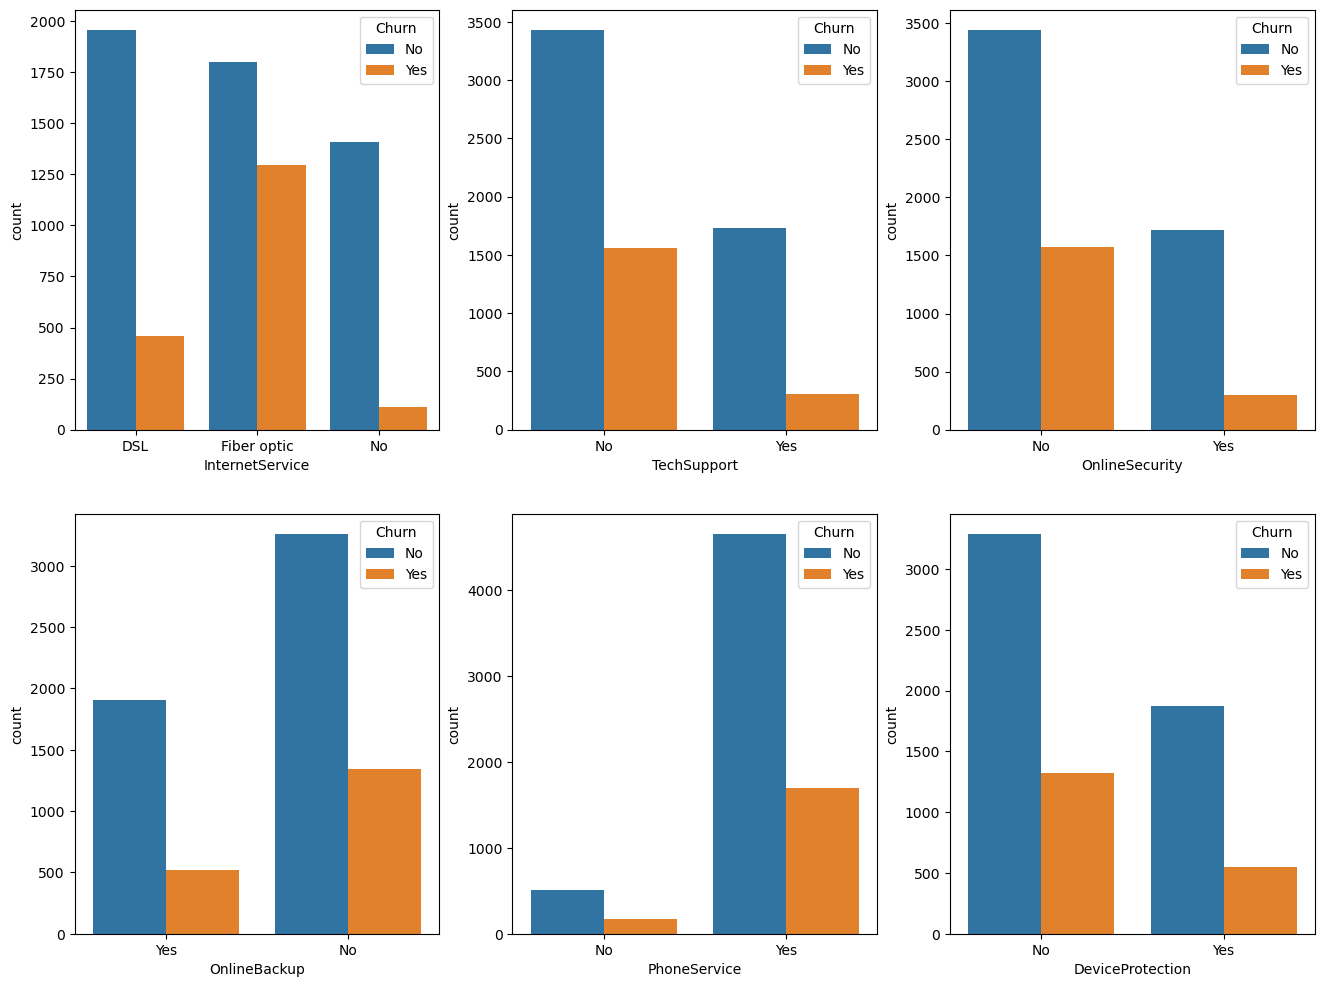

In [33]:
#  ConnecTel Services offered to Customers Via  Churn
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16,12))

#Internet Service by Churn
sns.countplot(data=df_churn, x='InternetService', hue='Churn', ax=axs[0,0])

# Tech Support  by Churn
sns.countplot(data=df_churn, x='TechSupport', hue='Churn', ax=axs[0,1])

# Online Security Service by Churn
sns.countplot(data=df_churn, x='OnlineSecurity', hue='Churn', ax=axs[0,2])

# Online Backup Service by Churn
sns.countplot(data=df_churn, x='OnlineBackup', hue='Churn', ax=axs[1,0])

# Phone Service by Churn
sns.countplot(data=df_churn, x='PhoneService', hue='Churn', ax=axs[1,1])

# Device Protection  Service by Churn
sns.countplot(data=df_churn, x='DeviceProtection', hue='Churn', ax=axs[1,2]);

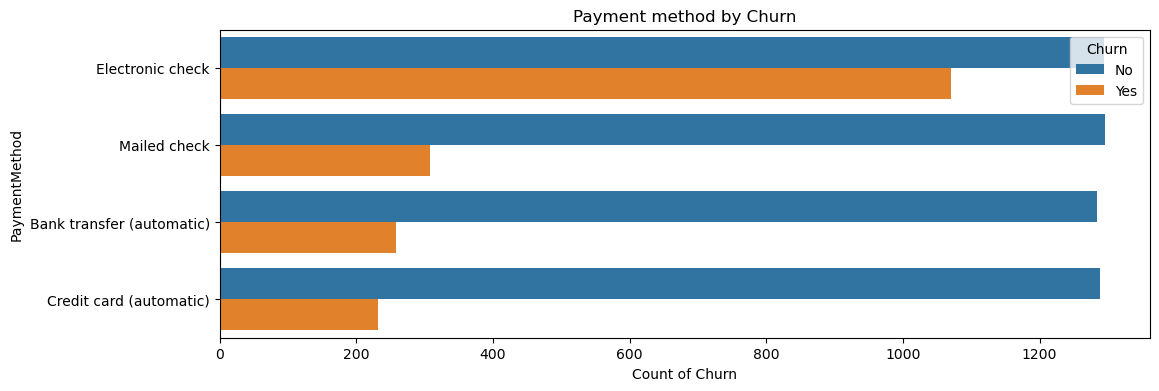

In [34]:
 #Payment method by Customer Churn
plt.figure(figsize=(12,4))
sns.countplot(data=df_churn, y='PaymentMethod', hue='Churn')
plt.xlabel('Count of Churn')
plt.title('Payment method by Churn');

#### Insights: The electronic check payment method was the most preferred method. 

In [35]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   object  
 6   MultipleLines     7032 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    7032 non-null   object  
 9   OnlineBackup      7032 non-null   object  
 10  DeviceProtection  7032 non-null   object  
 11  TechSupport       7032 non-null   object  
 12  StreamingTV       7032 non-null   object  
 13  StreamingMovies   7032 non-null   object  
 14  Contract          7032 non-null   object  
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod     7032 n

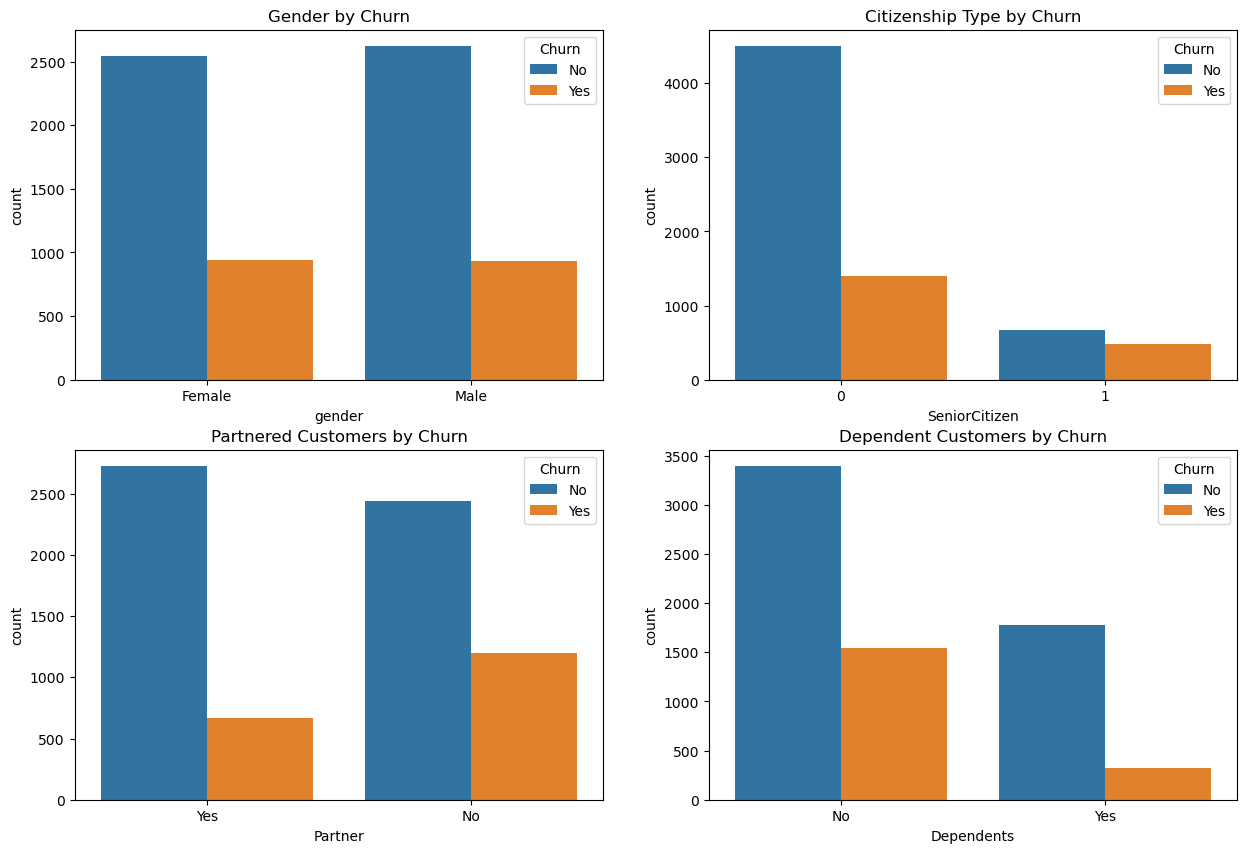

In [36]:
# Customer Demographics by Churn
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Gender Distribution by Churn
sns.countplot(data=df_churn, x='gender', hue='Churn', ax=axs[0,0])
axs[0,0].set_title('Gender by Churn')

# Citizenship Type by Churn
sns.countplot(data=df_churn, x='SeniorCitizen', hue='Churn', ax=axs[0,1])
axs[0,1].set_title('Citizenship Type by Churn')

# Customer relationship by Churn
sns.countplot(data=df_churn, x='Partner', hue='Churn', ax=axs[1,0])
axs[1,0].set_title('Partnered Customers by Churn')

# Customer dependency by Churn
sns.countplot(data=df_churn, x='Dependents', hue='Churn', ax=axs[1,1])
axs[1,1].set_title('Dependent Customers by Churn');

In [37]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


# MACHINE LEARNING

### Data Pre Processing

In [38]:
# Encoding of categorical columns into numerical

In [39]:
#method to return columns with object data types (categorical)
def col_unique_val(d):
    for col in d:
        if df_churn[col].dtypes == 'object':
            print(f'{col}: {df_churn[col].unique()}')

In [40]:
#apply the method on dataframe
col_unique_val(df_churn)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [41]:
#create an array of columns to be encoded
le_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling']

In [42]:
df_churn[le_columns] = df_churn[le_columns].replace({'Yes': 1, 'No' : 0})

In [43]:
col_unique_val(df_churn)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [44]:
df_churn['gender'] = df_churn['gender'].replace({'Male': 1, 'Female' : 0})

In [45]:
df_churn['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7032, dtype: int64

In [46]:
col_unique_val(df_churn)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [47]:
#Perform one-hot encoding on the remaining categorical columns

In [48]:
df_churn = pd.get_dummies(data=df_churn, columns=['InternetService','Contract','PaymentMethod'])

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_group,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,No,1 - 12,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,No,25 - 36,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,Yes,1 - 12,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,No,37 - 48,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,Yes,1 - 12,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,No,13 - 24,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,No,61 - 72,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,No,1 - 12,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,Yes,1 - 12,0,1,0,1,0,0,0,0,0,1


In [51]:
#create an instance of labelencoder()
labelEn = LabelEncoder()

#convert churn column into numerical values
df_churn['Churn'] = labelEn.fit_transform(df_churn['Churn'])

In [52]:
df_churn['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [53]:
df_churn = df_churn.drop('tenure_group', axis=1)

In [54]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,1,0,1,0,0,0,0,0,1


In [55]:
#Scaling

In [56]:
#create an array of the numerical features
numericalCols = ['tenure', 'TotalCharges', 'MonthlyCharges']

In [57]:
# Scaling of predictor variables

# Initialize scaler and fit-tranform data using scaler
scaler = MinMaxScaler()

df_churn[numericalCols] = scaler.fit_transform(df_churn[numericalCols])

In [58]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,0,1,0,1,0,0,0,0,0,1


### DATA SPLITTING

In [59]:
#Split data into x and y 

In [60]:
x = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

In [61]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,0,1,0,1,0,0,0,0,0,1


In [62]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [63]:
# Split the  data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0,0,0,0.591549,0,0,0,0,1,0,1,1,1,0.306468,0.237411,1,0,0,1,0,0,1,0,0,0
3410,1,0,0,0,0.028169,1,0,0,0,0,0,1,0,0,0.349751,0.019605,1,0,0,1,0,0,0,1,0,0
5483,0,0,1,0,0.760563,1,1,0,0,1,0,0,0,1,0.592040,0.512272,0,1,0,1,0,0,0,0,1,0
5524,1,0,1,1,0.619718,1,0,1,0,0,1,0,0,0,0.362189,0.292511,1,0,0,0,0,1,1,0,0,0
6337,0,0,1,1,0.760563,1,1,1,0,0,0,1,1,0,0.822388,0.626564,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,0.028169,1,1,0,0,0,0,0,0,0,0.319900,0.013668,1,0,0,1,0,0,1,0,0,0
5199,0,0,0,0,0.704225,1,1,0,1,1,1,1,1,1,0.927861,0.655949,0,1,0,0,1,0,0,0,1,0
5235,1,0,0,0,0.112676,1,1,1,0,0,0,0,0,1,0.625871,0.088351,0,1,0,1,0,0,0,0,1,0
5399,0,0,0,0,0.690141,1,0,0,0,0,0,0,0,0,0.014925,0.111961,0,0,1,0,1,0,1,0,0,0


In [65]:
y_train

6030    1
3410    1
5483    1
5524    0
6337    0
       ..
3778    0
5199    0
5235    0
5399    0
862     1
Name: Churn, Length: 5625, dtype: int64

###  Model Building

#Algorithms for model:
Logistic Regression
Naive Bayes
Random Forest
Support Vector Machines

In [66]:
 #Logistic Regression 
lr = LogisticRegression()        # instantiate model
lr.fit(X_train, y_train)         # train the machine model


LogisticRegression()

In [67]:
#predict
lr_p = lr.predict(X_test)

In [68]:
lr_p

array([0, 0, 1, ..., 0, 0, 0])

### Gaussian NB

In [69]:
# Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [70]:
nb_pred = nb.predict(X_test)

In [71]:
nb_pred

array([0, 0, 1, ..., 0, 0, 0])

### Random Forest Classifier

In [72]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
rf_pred = rf.predict(X_test)

In [74]:
rf_pred

array([0, 0, 1, ..., 0, 0, 0])

### Support Vector Classifier

In [75]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [76]:
svc = svc.predict(X_test)

In [77]:
svc

array([0, 0, 1, ..., 0, 0, 0])

## 3.3 Model Evaluation
The metrics used for the model evaluation are Recall_Score, Precision_Score, F1_Score, and Accuracy_Score. Recall_Score is the primary metric as it measures the model's ability to identify correctly customers that will churn. It reduces the probability of classifying a customer who will Churn as No-Churn.

In [78]:
outcome = classification_report(y_test, rf_pred, labels=[0,1])
print(outcome)

              precision    recall  f1-score   support

           0       0.83      0.89      0.85      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [79]:
outcome = classification_report(y_test, lr_p, labels=[0,1])
print(outcome)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [80]:
outcome = classification_report(y_test, svc, labels=[0,1])
print(outcome)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



*Insights*:
- With Recall_Score being the primary metric, most algorithms did not perform well though the other metrics of Precision_Score, F1_Score and Accuracy_Score were better. Naive Bayes algorithm with a rate of 73.44% gave the best Recall_Score with the other algorithms hovering around 50%.

## Hyperparameters Tuning
The hyperparameters of the various algorithms are tuned to improve the Recall_Score using GridSearchCV

In [81]:
# Logistic Regression
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet', None]}

grid_search = GridSearchCV(lr, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.5612527964205818, for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [82]:
# Naive Bayes
param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}

grid_search = GridSearchCV(nb, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.787324384787472, for {'var_smoothing': 0.1}


In [83]:
# Random Forest
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20, 30]}

grid_search = GridSearchCV(rf, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.5344563758389261, for {'max_depth': 10, 'n_estimators': 100}


In [84]:
# Support Vector Machines
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto', 0.1, 1]}
svc = SVC()

grid_search = GridSearchCV(svc, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.5539105145413871, for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


##  Building and Evaluating Model using Naive Bayes (tuned hyperparameter)

Classification Report: Naive Bayes Model
----------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.77      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407



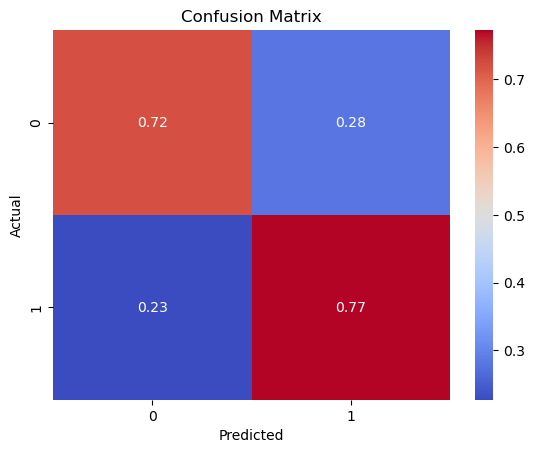

In [85]:
nb_tuned = GaussianNB(var_smoothing= 1.0)
nb_tuned.fit(X_train, y_train)
nb_tuned_pred = nb_tuned.predict(X_test)

print('Classification Report: Naive Bayes Model')
print('----------------------------------------')
print(classification_report(y_test, nb_tuned_pred))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, nb_tuned_pred, normalize='true'), annot=True, cmap='coolwarm')
ax.set_title('Confusion Matrix')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted');

*Observation*: 
- The selected algorithm for the Customer Churn Prediction model is Naive Bayes with an improved Recall_Score of 78%. That is out of every 5 churn customers the model can identify about 4 of them correctly.

### Conclusion

In this task, I aimed at getting an understanding of the Customer Churn Challenge that ConnectTel faced. I also gained the following insights. 
1.ConnectTel's Customer Churn Rate of 26.6% translating to 3 out of 10 customers churning.
2.The Revenue Impact of the Customer Churn  is approximately a third of the monthly recurring revenue ($ 139,130)
3. The Payment Method with the highest churn was Electrical Check as compared to the other methods of payment. 
4. Customer Gender did not influence Customer Churn
5.Phone and Internet Services did not influence Customer Churn
6.Customer Tenure Group Distribution: ConnectTel's customers fall into two groups: very new and very old. Churn is higher among new customers compared to old customers.(1-12 months, than 61-72 months)
7.Customers who are on the monthly contracts have  the highest number of churn as, than  those on the  1 year ot Two  year contract .

#### ConnectTel Customer Retention Initiatives
1.ConnectTel should make more suitable long term products as opposed to Monthly ones. 
2.ConnectTel should organize promotions for customers who use automatic payment methods so as to encourage more of them towards that payment method.
3. There should be a welcome promotion of ConnectTel services, which will span through 5 years and beyond  so customers are encouraged to stay long term.
4.There should be more Fibre Optic Internet Service Packages. 
5. All ConnectTel services must be linked to support services so that customers will have to subscribe to them as part of any service they use. 

#### Prediction System
This churn prediction system has been developed for ConnectTel using the Naive Bayes algorithm with other machine learning techniques such as:
Data Preprocessing and Feature Engineering
Exploratory Data Analysis
Model building, Tunind, and Evaluation
The churn prediction system has a recall score of 78%,which means that  that is it identifies approximately 4 of every 5 churning customers which will help reduce churn and revenue loss. ConnectTel can build applications based on this predictive system for Customer Churn Prediction.

### Limitations
The Data that ConnectTel provided to me, lacked insights to the various packages in the services provided ( internet service packages, mobile service packages and fibre optic service packages). These would have given an insight on customer churn based on the type of packages, leading to the creation of better suited offerings and new ones to capture more customers so they stay relevant in the competitive market. 

 